## Part 1: OLAP crime data analysis
## part 2: unsupervised learning for spatial data analysis
## Optional Part: time series data analysis

In [2]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [3]:
# Read data from data storage
# upload data into databricks community
crime_data_lines = sc.textFile('/FileStore/tables/sf_data.csv')
# prepare data
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
# get header
header = df_crimes.first()
print(header)

# #remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

# get the first line of data
# display(crimes.take(3))

# get the total number of data 
print(crimes.count())

['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId']
8977

#### Solove big data issues via Spark
#######approach 1: use RDD (not recommend)
####approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)
####approach 3: use SQL (recomend for data analysis or DS， 基础比较差的同学)
####note: you only need to choose one of approaches as introduced above

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/sf_data.csv")
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")


IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


In [6]:
from pyspark.sql import Row

def CreateRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: CreateRow(header, x))

df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
display(df_opt2)

Address,Category,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,PdId,Resolution,Time,X,Y
SHIPLEY ST / 4TH ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176184067,"(37.7815876234701, -122.40061739890338)",SOUTHERN,17618406706244,NONE,18:15,-122.40061739890338,37.7815876234701
HAYES ST / SCOTT ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183906,"(37.775205514978545, -122.43613031282463)",PARK,17618390606244,NONE,09:45,-122.43613031282463,37.775205514978545
KIRKHAM ST / LA PLAYA ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183423,"(37.75841171643452, -122.50910925205717)",TARAVAL,17618342306244,NONE,10:50,-122.50910925205717,37.75841171643452
100 Block of LAKE ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182776,"(37.78689526736518, -122.46095180410846)",RICHMOND,17618277606244,NONE,18:00,-122.46095180410846,37.78689526736518
POINTLOBOS AV / 48TH AV,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182754,"(37.779849075879056, -122.50943307434102)",RICHMOND,17618275406244,NONE,07:15,-122.50943307434102,37.779849075879056
2200 Block of HAYES ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176182538,"(37.773052871338244, -122.4534813455352)",PARK,17618253806372,NONE,10:00,-122.4534813455352,37.773052871338244
500 Block of JOHNFKENNEDY DR,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182522,"(37.772540539159316, -122.46620466789287)",RICHMOND,17618252206244,NONE,12:00,-122.46620466789287,37.772540539159316
1800 Block of 10TH AV,BURGLARY,07/11/2017,Tuesday,"BURGLARY, UNLAWFUL ENTRY",176181778,"(37.753714592060966, -122.4667330308776)",TARAVAL,17618177805073,NONE,14:43,-122.4667330308776,37.753714592060966
17TH AV / TARAVAL ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176181762,"(37.74314326922748, -122.4735538773959)",TARAVAL,17618176206244,NONE,18:45,-122.4735538773959,37.74314326922748
800 Block of BRYANT ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176181665,"(37.775420706711, -122.40340479147905)",SOUTHERN,17618166506372,NONE,20:44,-122.40340479147905,37.775420706711


In [7]:
df_opt3 = crimes.toDF(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3)
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


### Q1 Write a Spark program that counts the number of crimes for different category.

In [9]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [10]:
crimeCategory = spark.sql(
  "SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
WARRANTS,312
SUSPICIOUS OCC,312
BURGLARY,302
MISSING PERSON,265


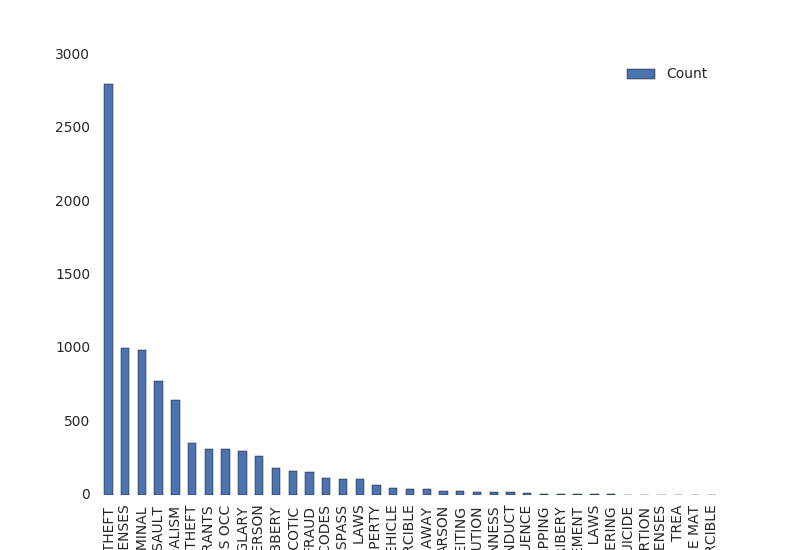

In [11]:
# visualize the result

crimes_pd_df = crimeCategory.toPandas()
# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 
p=crimes_pd_df.plot.bar(x='category',y='Count')
display()



## Q2 Count number of crimes for different district and visualize

In [13]:
q2_result = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending = False)
display(q2_result)

PdDistrict,count
SOUTHERN,1745
MISSION,1191
NORTHERN,1173
CENTRAL,1137
BAYVIEW,817
INGLESIDE,670
TARAVAL,662
TENDERLOIN,536
RICHMOND,527
PARK,519


In [14]:
CrimeDistrict = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(CrimeDistrict)

PdDistrict,Count
SOUTHERN,1745
MISSION,1191
NORTHERN,1173
CENTRAL,1137
BAYVIEW,817
INGLESIDE,670
TARAVAL,662
TENDERLOIN,536
RICHMOND,527
PARK,519


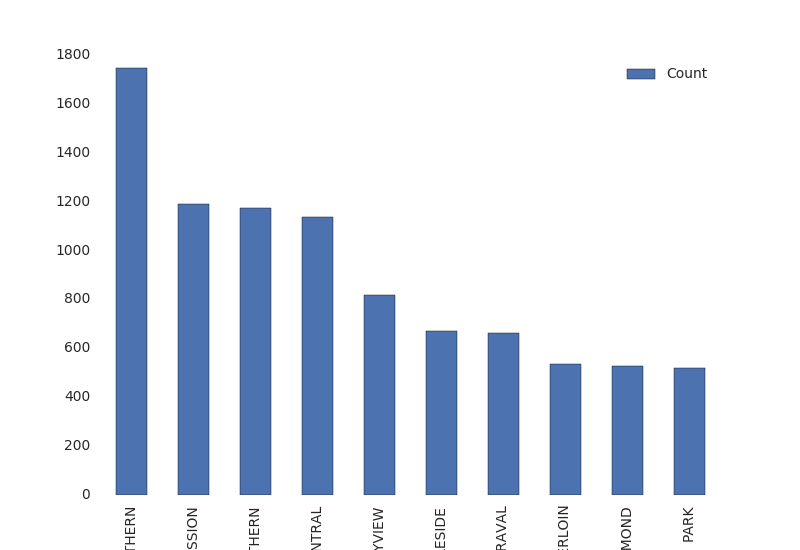

In [15]:
q2_pd = CrimeDistrict.toPandas()
p2 = q2_pd.plot.bar(x = 'PdDistrict', y = 'Count')
display()

## Q3 
Count the number of crimes each "Sunday" at "SF downtown". hints: SF downtown is defiend via the range of spatial location. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range.

In [17]:
# q3_result = df_opt1.groupBy('DayOfWeek' == 'Sunday' and 'pow(Y - 37.792489, 2) + pow(X + 122.403221, 2) < pow(0.005, 2)').count().orderBy('count', ascending = False)
q3_result = df_opt1.withColumn('X', df_opt1["X"].cast('double')) \
                 .withColumn('Y', df_opt1["Y"].cast('double')) 

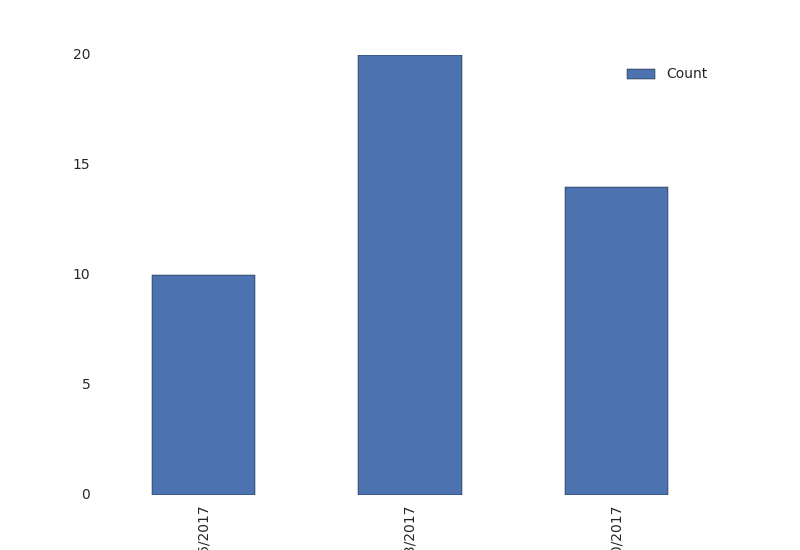

In [18]:
q3 = spark.sql("select Date, DayOfWeek, count(*) as Count from sf_crime \
                   where DayOfWeek = 'Sunday' and \
                   pow(Y - 37.792489, 2) + pow(X + 122.403221, 2) < pow(0.005, 2) \
                   group by Date, DayOfWeek order by Date")
crimes_ds_df = q3.toPandas()
p2=crimes_ds_df.plot.bar(x='Date',y='Count')
display()

## Q4 
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [20]:
# import datetime
# a = 
# crime_by_month = df_opt1.

In [21]:
Crime_by_month = spark.sql("SELECT to_date(Date, 'MM/dd/yyyy') as month, count(*) as Count FROM sf_crime GROUP BY month ORDER BY Count")
display(Crime_by_month)
#  我觉得这个很有问题啊


month,Count
2017-07-31,369
2017-07-24,381
2017-07-11,389
2017-07-30,391
2017-07-26,397
2017-07-12,400
2017-07-16,405
2017-07-27,406
2017-07-25,430
2017-07-19,435


## Q5
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15, 2018/10/15. Then, give your travel suggestion to visit SF.

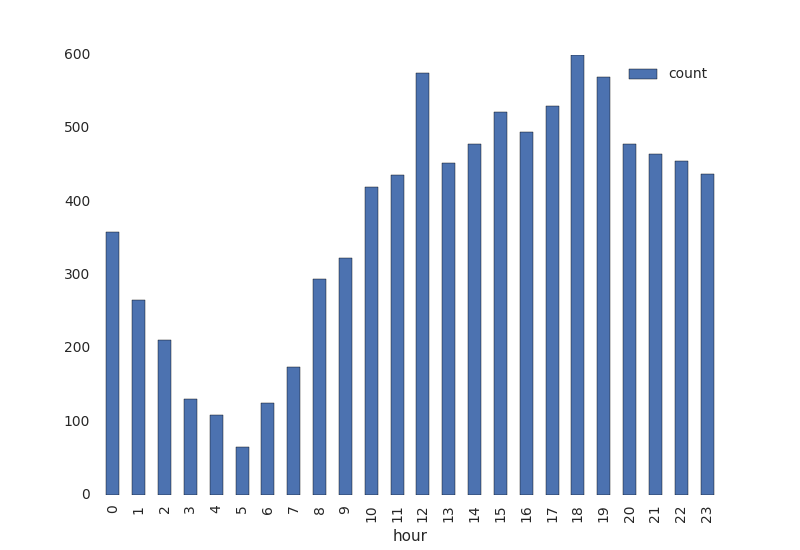

In [23]:
Crime_by_hour = spark.sql("SELECT hour(time) as hour,count(*) as count FROM sf_crime group by hour(time) order by hour")
display(Crime_by_hour)
crimes_hour_df = Crime_by_hour.toPandas()
p3=crimes_hour_df.plot.bar(x='hour',y='count')
display()

In [25]:
# # For certain date 
# Crime_on_same_day = spark.sql("SELECT hour(time) as hour, count(*) as Count FROM se_crime where month(date)=12 and day(date)=15 group by hour(time) order by hour)
# display(Crime_by_hour_same_day)

# crimes_hour_same_day_df = Crime_by_hour_same_day.toPandas()
# p3=crimes_hour_same_day_df.plot.bar(x='hour',y='count')
# display()

## Q6
(1) Step1: Find out the top-3 danger disrict
 (2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1
(3) give your advice to distribute the police based on your analysis results.

In [27]:
# (1) find out the top-3 danger district
# Spark SQL answer
top3_crimeDistrict = spark.sql("SELECT PdDistrict, COUNT(*) as Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC limit 3")
display(top3_crimeDistrict)

PdDistrict,Count
SOUTHERN,1745
MISSION,1191
NORTHERN,1173


In [28]:
# Find out the crime event w.r.t category and time(hour) from the result of step 1
# Southern by hour
crimeINFO_Southern = spark.sql("SELECT hour(time) as hour, COUNT(*) as Count FROM sf_crime where PdDistrict = 'SOUTHERN' GROUP BY hour Order by Count DESC")
display(crimeINFO_Southern)

hour,Count
18,124
12,113
14,102
19,101
21,100
15,97
11,92
17,91
13,89
0,89


In [29]:
# MISSION by hour
crimeINFO_Mission = spark.sql("SELECT hour(time) as hour, COUNT(*) as Count FROM sf_crime where PdDistrict = 'MISSION' GROUP BY hour Order by Count DESC")
display(crimeINFO_Mission)

hour,Count
19,87
17,76
18,74
23,68
0,65
20,64
15,64
12,63
22,56
21,56


In [30]:
#Nothern by hour
crimeINFO_Northern = spark.sql("SELECT hour(time) as hour, COUNT(*) as Count FROM sf_crime where PdDistrict = 'NORTHERN' GROUP BY hour Order by Count DESC")
display(crimeINFO_Northern)

hour,Count
19,86
17,79
18,79
20,75
16,72
23,69
12,68
21,62
15,62
22,58


In [31]:
# Southern by Category
crime_category_Southern = spark.sql("select category,count(*) as count from sf_crime where PdDistrict='SOUTHERN' group by category order by count")
display(crime_category_Southern)

category,count
SUICIDE,1
PROSTITUTION,1
LIQUOR LAWS,1
EXTORTION,1
EMBEZZLEMENT,2
BRIBERY,2
KIDNAPPING,2
DISORDERLY CONDUCT,3
ARSON,4
DRUNKENNESS,4


In [32]:
# Mission by Category
crime_category_Mission = spark.sql("select category,count(*) as count from sf_crime where PdDistrict='MISSION' group by category order by count")
display(crime_category_Mission)

category,count
LIQUOR LAWS,1
BRIBERY,2
DRUNKENNESS,3
LOITERING,3
ARSON,4
FORGERY/COUNTERFEITING,6
DISORDERLY CONDUCT,6
RECOVERED VEHICLE,6
DRIVING UNDER THE INFLUENCE,7
"SEX OFFENSES, FORCIBLE",9


In [33]:
# Nothern by Category
crime_category_Northern = spark.sql("select category,count(*) as count from sf_crime where PdDistrict='NORTHERN' group by category order by count")
display(crime_category_Northern)

category,count
PROSTITUTION,1
DRIVING UNDER THE INFLUENCE,1
BRIBERY,1
KIDNAPPING,1
DRUNKENNESS,2
ARSON,3
"SEX OFFENSES, FORCIBLE",5
RECOVERED VEHICLE,6
FORGERY/COUNTERFEITING,6
SECONDARY CODES,7


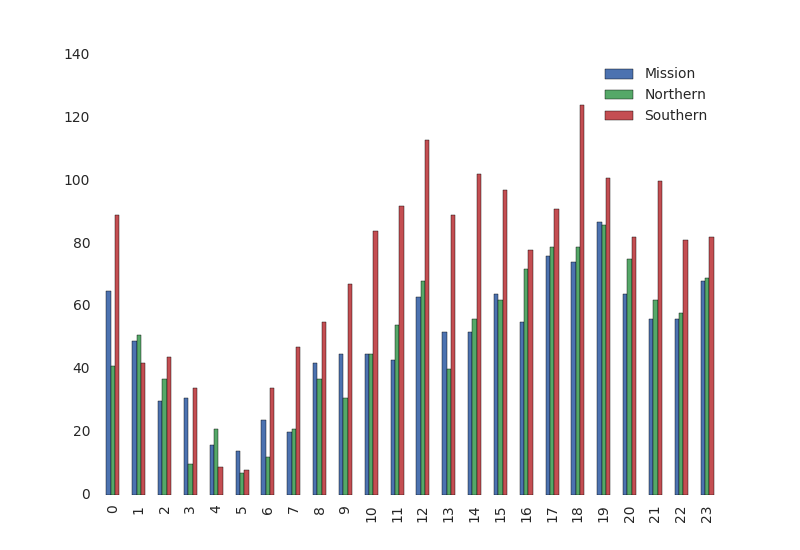

In [34]:
# TOP 3 dangerous crime district crime count by hour
S_by_hour = spark.sql("select count(*) as count from sf_crime where PdDistrict='SOUTHERN' group by hour(time) order by hour(time)")
M_by_hour = spark.sql("select count(*) as count from sf_crime where PdDistrict='MISSION' group by hour(time) order by hour(time)")
N_by_hour = spark.sql("select count(*) as count from sf_crime where PdDistrict='NORTHERN' group by hour(time) order by hour(time)")

df = pd.DataFrame({'Southern': S_by_hour.toPandas().as_matrix().flatten(),'Mission': M_by_hour.toPandas().as_matrix().flatten(),'Northern': N_by_hour.toPandas().as_matrix().flatten()}, index = list(range(24)) )
ax = df.plot.bar()
display()


From the visualization, we can conclude that crimes in sf often occur from 17-18.

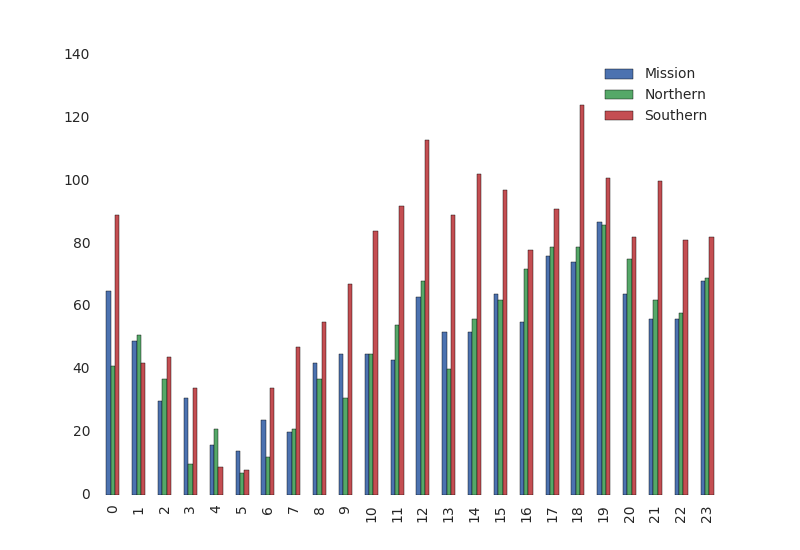

In [36]:
S_by_hour = spark.sql("select count(*) as count from sf_crime where PdDistrict='SOUTHERN' group by hour(time) order by hour(time)")
M_by_hour = spark.sql("select count(*) as count from sf_crime where PdDistrict='MISSION' group by hour(time) order by hour(time)")
N_by_hour = spark.sql("select count(*) as count from sf_crime where PdDistrict='NORTHERN' group by hour(time) order by hour(time)")

df = pd.DataFrame({'Southern': S_by_hour.toPandas().as_matrix().flatten(),'Mission': M_by_hour.toPandas().as_matrix().flatten(),'Northern': N_by_hour.toPandas().as_matrix().flatten()}, index = list(range(24)) )
ax = df.plot.bar()
display()

## Q7
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [38]:
resolution_rate = spark.sql("select category, SUM(case when resolution = 'NONE' then 1 else 0 end) * 100.0 / count(*) as unresolved_perc from sf_crime group by category order by unresolved_perc desc")
display(resolution_rate)

category,unresolved_perc
RUNAWAY,100.0
PORNOGRAPHY/OBSCENE MAT,100.0
EXTORTION,100.0
TREA,100.0
SUICIDE,100.0
LARCENY/THEFT,95.97147950089126
MISSING PERSON,92.0754716981132
NON-CRIMINAL,90.61553985872855
RECOVERED VEHICLE,89.58333333333333
VANDALISM,89.38461538461539


## Q8 Apply Spark ML clustering for spatial data analysis

In [40]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline

df_select = df_opt1.withColumn('X', df_opt1["X"].cast('double')) \
                 .withColumn('Y', df_opt1["Y"].cast('double')) 

data = df_select.select('X','Y')
# select feature
vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
kmeans = KMeans(k=5, seed=1)

pipeline = Pipeline(stages=[vecAssembler, kmeans])
model = pipeline.fit(data)

q8_result = model.transform(data)
q8_result = q8_result.toPandas()

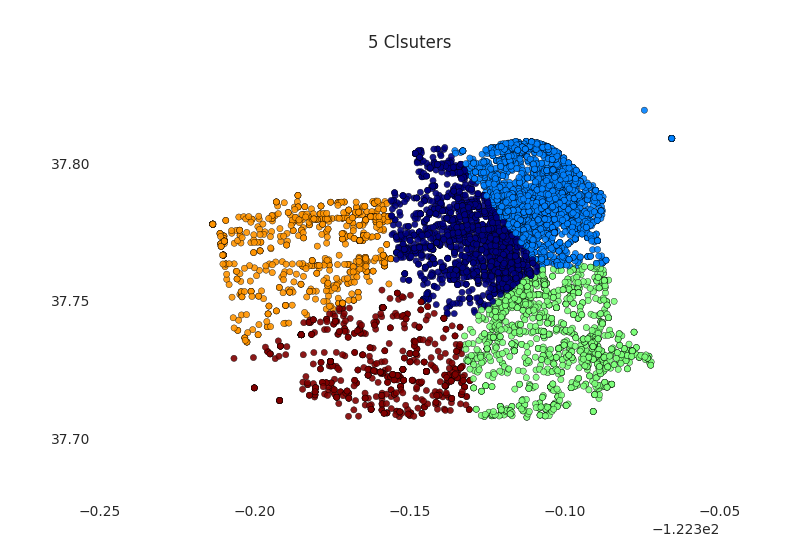

In [41]:
fig, ax = plt.subplots()
ax.scatter(q8_result['X'], q8_result['Y'], c=(q8_result['prediction']),cmap=plt.cm.jet, alpha=0.9)
ax.set_title("clusters")
display()


We utilized Spark and analyzed crime data in SF area from 2015 to 2018. After analyzing, we could find insights from multiple dimensions such as crime time, location and category. And thus, it would help policy makers to find solutions and decrease the crime rate in SF area.
We used spark SQL and data visulization to analyize. The data size is about 1M.
From the data, we found that January, March, October are the top three months that crimes happened. We also found Southern，Mission，Northern are the top three districts that crimes happened. And usually crime numbers increased from 5am to 7pm and decreased then. We recommend travelers should avoid these areas and time. And policy makers should focus on crimes with high none-resolution rates.